<h3>Loading and Displaying the Data </h3>

In [161]:
import pandas as pd

# Load the CSV file into a DataFrame
data_path = 'world-data-2023.csv'  # Simplified path assuming the file is in the same directory as the notebook
data = pd.read_csv(data_path)

# Selected specific columns for the analysis
selected_columns = [
    'Country', 
    'Land Area(Km2)', 
    'Density(P/Km2)', 
    'Co2-Emissions', 
    'Gross primary education enrollment (%)', 
    'Agricultural Land( %)', 
    'Tax revenue (%)', 
    'Life expectancy',
]

# Update the DataFrame to only include selected columns
data = data[selected_columns]

# Displaying the first five rows of the selected data to confirm the selection
print(data.head(5))


       Country Land Area(Km2) Density(P/Km2) Co2-Emissions Gross primary education enrollment (%)  \
0  Afghanistan        652,230             60         8,672                                104.00%   
1      Albania         28,748            105         4,536                                107.00%   
2      Algeria      2,381,741             18       150,006                                109.90%   
3      Andorra            468            164           469                                106.40%   
4       Angola      1,246,700             26        34,693                                113.50%   

  Agricultural Land( %) Tax revenue (%)  Life expectancy  
0                58.10%           9.30%             64.5  
1                43.10%          18.60%             78.5  
2                17.40%          37.20%             76.7  
3                40.00%             NaN              NaN  
4                47.50%           9.20%             60.8  


<h4>Theoretical Framework</h4>

<h5>Countries Excelling in Sustainability and Quality of Life Metrics</h5>
<ul>
    <li>
        <h5>Country</h5>
        <ul>
            <li><strong>Why Included:</strong> The country provides a geographical frame of reference for the data.</li>
            <li><strong>Usage:</strong> Used as the primary identifier for data aggregation and comparison. It serves as a categorical independent variable.</li>
        </ul>
    </li>
    <li>
        <h5>Land Area (Km²)</h5>
        <ul>
            <li><strong>Why Included:</strong> Provides insight into the spatial dimensions of a country, influencing agricultural capacity and resource management.</li>
            <li><strong>Usage:</strong> Analyzes how land area correlates with agricultural use and sustainability efforts. Independent variable influencing sustainability metrics.</li>
        </ul>
    </li>
    <li>
        <h5>Density (P/Km²)</h5>
        <ul>
            <li><strong>Why Included:</strong> Reflects population density, which impacts land use and agricultural practices.</li>
            <li><strong>Usage:</strong> Helps to assess the pressure on land and resources, influencing sustainable agriculture strategies. Independent variable.</li>
        </ul>
    </li>
    <li>
        <h5>CO2 Emissions</h5>
        <ul>
            <li><strong>Why Included:</strong> Indicates the environmental impact of agricultural and industrial activities.</li>
            <li><strong>Usage:</strong> Serves as an environmental indicator for assessing sustainability in agricultural practices. Independent variable.</li>
        </ul>
    </li>
    <li>
        <h5>Agricultural Land (%)</h5>
        <ul>
            <li><strong>Why Included:</strong> Represents a country's allocation of natural resources to agriculture.</li>
            <li><strong>Usage:</strong> Assesses the extent of land dedicated to sustainable agricultural practices. Independent variable.</li>
        </ul>
    </li>
    <li>
        <h5>Gross Primary Education Enrollment (%)</h5>
        <ul>
            <li><strong>Why Included:</strong> Education level can influence the adoption of sustainable practices and technological advancements in agriculture.</li>
            <li><strong>Usage:</strong> Measures the potential for educated decision-making in agricultural practices. Independent variable.</li>
        </ul>
    </li>
    <li>
        <h5>Tax Revenue (%)</h5>
        <ul>
            <li><strong>Why Included:</strong> Tax revenue as a percentage of GDP can indicate economic health and investment capacity in agriculture and other sustainable practices.</li>
            <li><strong>Usage:</strong> Analyzes fiscal health as it relates to funding sustainable agricultural initiatives and improving quality of life. Independent variable.</li>
        </ul>
    </li>
    <li>
        <h5>Life Expectancy</h5>
        <ul>
            <li><strong>Why Included:</strong> Life expectancy serves as a broad indicator of overall public health and quality of life, reflecting the success of sustainable practices.</li>
            <li><strong>Usage:</strong> Used to gauge the long-term impacts of sustainability on population health. Dependent variable.</li>
        </ul>
    </li>
</ul>


<h3>Cleaning the Data</h3>

In [162]:
# Removing commas and converting to numeric types
data['Land Area(Km2)'] = pd.to_numeric(data['Land Area(Km2)'].str.replace(',', ''), errors='coerce')
data['Density(P/Km2)'] = pd.to_numeric(data['Density(P/Km2)'].str.replace(',', ''), errors='coerce')
data['Co2-Emissions'] = pd.to_numeric(data['Co2-Emissions'].str.replace(',', ''), errors='coerce')
data['Gross primary education enrollment (%)'] = pd.to_numeric(data['Gross primary education enrollment (%)'].str.rstrip('%'), errors='coerce') / 100
data['Agricultural Land( %)'] = pd.to_numeric(data['Agricultural Land( %)'].str.rstrip('%'), errors='coerce') / 100
data['Tax revenue (%)'] = pd.to_numeric(data['Tax revenue (%)'].str.rstrip('%'), errors='coerce') / 100
data['Life expectancy'] = pd.to_numeric(data['Life expectancy'], errors='coerce')


In [163]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values before handling:")
print(missing_values)

Missing values before handling:
Country                                    0
Land Area(Km2)                             1
Density(P/Km2)                             0
Co2-Emissions                              7
Gross primary education enrollment (%)     7
Agricultural Land( %)                      7
Tax revenue (%)                           26
Life expectancy                            8
dtype: int64


<h4>Dealing with empty rows</h4>

In [164]:
from sklearn.impute import SimpleImputer

# Store indices of rows with missing values
missing_indices_before = data[data.isnull().any(axis=1)].index

# Handling missing values
# Imputation
impute_columns = ['Life expectancy']
imputer = SimpleImputer(strategy='mean')
data[impute_columns] = imputer.fit_transform(data[impute_columns])

# Dropping Rows
# For rows with missing values in other columns, we'll drop them
dropped_rows = data[data.isnull().any(axis=1)]
data.dropna(subset=['Gross primary education enrollment (%)', 'Co2-Emissions', 'Tax revenue (%)'], inplace=True)

# Print the dropped rows
print("\nRows dropped due to missing values:")
print("The data for the following country doesn't exist and therefore cannot be included in the dataset. This could be checked on the following portal: https://data.worldbank.org/indicator/GC.TAX.TOTL.GD.ZS?end=2023&locations=CU&most_recent_value_desc=false&start=2000&view=chart")
print(dropped_rows)

# Check missing values after handling
missing_values_after = data.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after)



Rows dropped due to missing values:
The data for the following country doesn't exist and therefore cannot be included in the dataset. This could be checked on the following portal: https://data.worldbank.org/indicator/GC.TAX.TOTL.GD.ZS?end=2023&locations=CU&most_recent_value_desc=false&start=2000&view=chart
                            Country  Land Area(Km2)  Density(P/Km2)  Co2-Emissions  \
3                           Andorra        4.68e+02             164          469.0   
21           Bosnia and Herzegovina        5.12e+04              64        21848.0   
24                           Brunei        5.76e+03              83         7664.0   
34                             Chad        1.28e+06              13         1016.0   
38                          Comoros        2.24e+03             467          202.0   
42                             Cuba        1.11e+05             106        28284.0   
47                         Djibouti        2.32e+04              43          620.0   
50

In [165]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values before handling:")
print(missing_values)

Missing values before handling:
Country                                   0
Land Area(Km2)                            0
Density(P/Km2)                            0
Co2-Emissions                             0
Gross primary education enrollment (%)    0
Agricultural Land( %)                     0
Tax revenue (%)                           0
Life expectancy                           0
dtype: int64


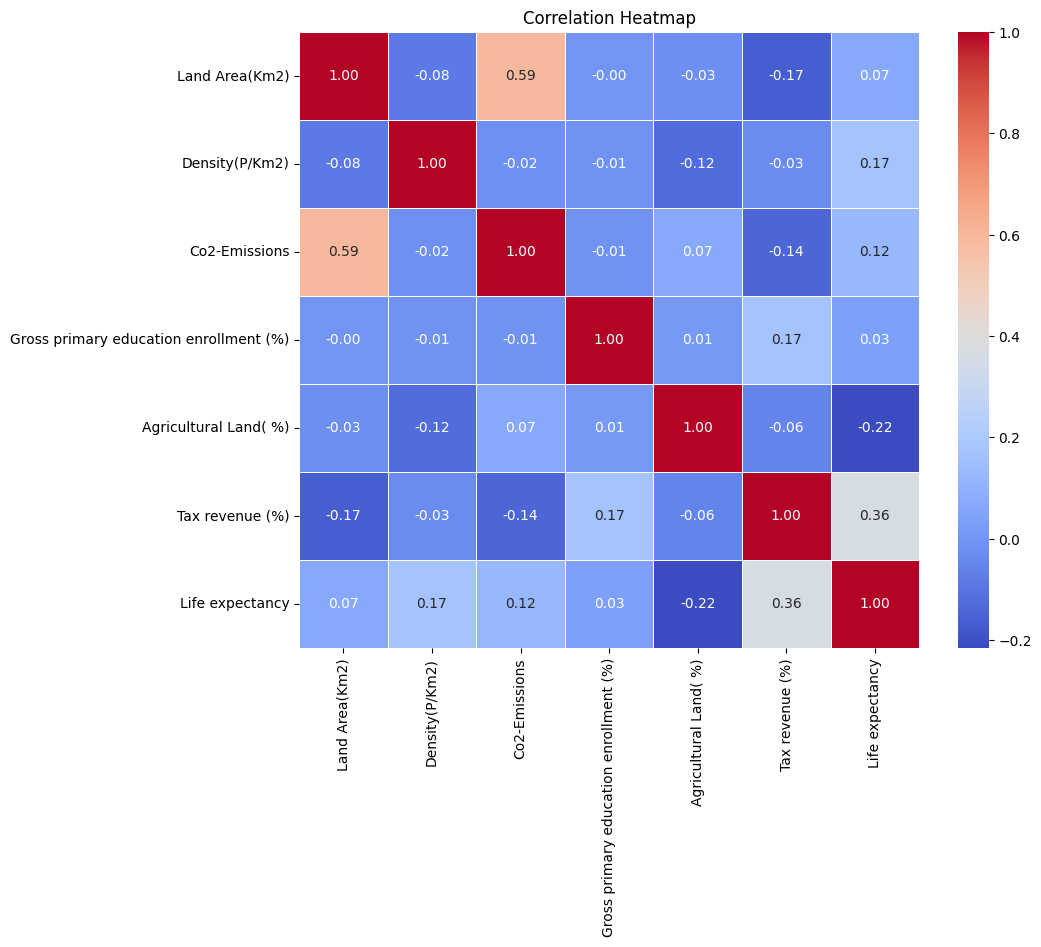

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns from the correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<h3>Scatter Plots</h3>

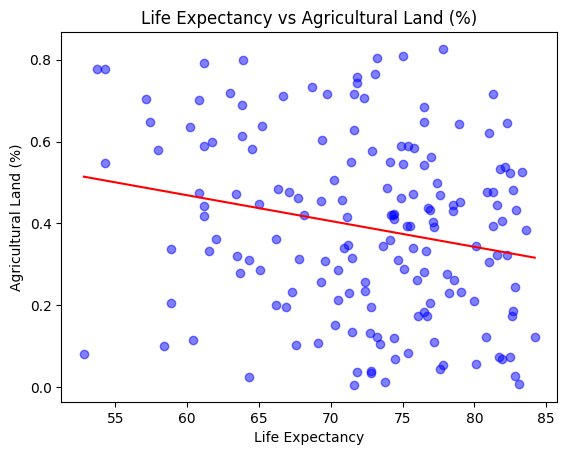

In [167]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Scatter plot for Life Expectancy vs Agricultural Land (%)
plt.title('Life Expectancy vs Agricultural Land (%)')
plt.xlabel('Life Expectancy')
plt.ylabel('Agricultural Land (%)')
plt.scatter(data['Life expectancy'], data['Agricultural Land( %)'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Life expectancy'], data['Agricultural Land( %)'], 1)
line = slope * np.unique(data['Life expectancy']) + intercept

plt.plot(np.unique(data['Life expectancy']), line, color='red')
plt.show()


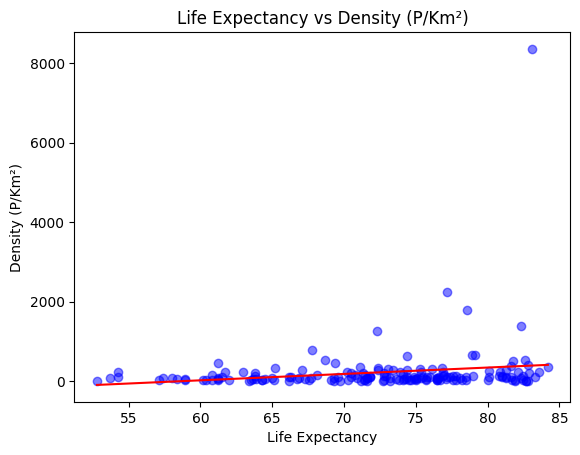

In [168]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Scatter plot for Life Expectancy vs Density (P/Km²)
plt.title('Life Expectancy vs Density (P/Km²)')
plt.xlabel('Life Expectancy')
plt.ylabel('Density (P/Km²)')
plt.scatter(data['Life expectancy'], data['Density(P/Km2)'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Life expectancy'], data['Density(P/Km2)'], 1)
line = slope * np.unique(data['Life expectancy']) + intercept

plt.plot(np.unique(data['Life expectancy']), line, color='red')
plt.show()


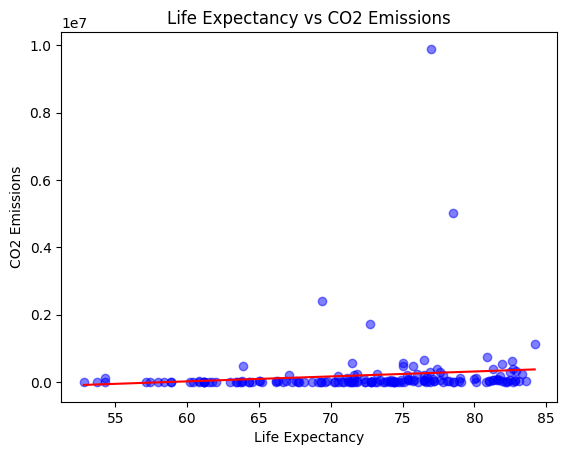

In [169]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Scatter plot for Life Expectancy vs CO2 Emissions
plt.title('Life Expectancy vs CO2 Emissions')
plt.xlabel('Life Expectancy')
plt.ylabel('CO2 Emissions')
plt.scatter(data['Life expectancy'], data['Co2-Emissions'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Life expectancy'], data['Co2-Emissions'], 1)
line = slope * np.unique(data['Life expectancy']) + intercept

plt.plot(np.unique(data['Life expectancy']), line, color='red')
plt.show()


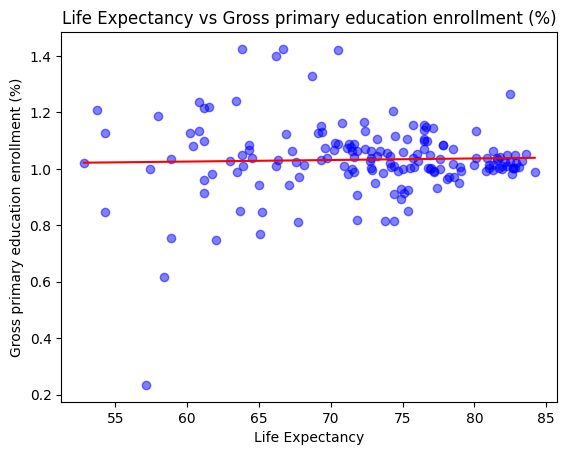

In [170]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Scatter plot for Life Expectancy vs Gross primary education enrollment (%)
plt.title('Life Expectancy vs Gross primary education enrollment (%)')
plt.xlabel('Life Expectancy')
plt.ylabel('Gross primary education enrollment (%)')
plt.scatter(data['Life expectancy'], data['Gross primary education enrollment (%)'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Life expectancy'], data['Gross primary education enrollment (%)'], 1)
line = slope * np.unique(data['Life expectancy']) + intercept

plt.plot(np.unique(data['Life expectancy']), line, color='red')
plt.show()


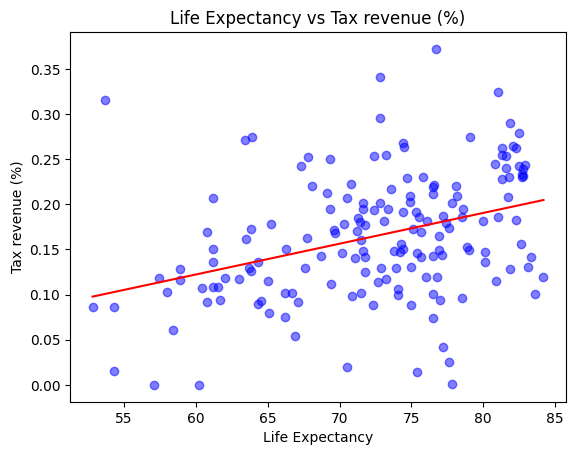

In [171]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Scatter plot for Life Expectancy vs Tax revenue (%)
plt.title('Life Expectancy vs Tax revenue (%)')
plt.xlabel('Life Expectancy')
plt.ylabel('Tax revenue (%)')
plt.scatter(data['Life expectancy'], data['Tax revenue (%)'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Life expectancy'], data['Tax revenue (%)'], 1)
line = slope * np.unique(data['Life expectancy']) + intercept

plt.plot(np.unique(data['Life expectancy']), line, color='red')
plt.show()


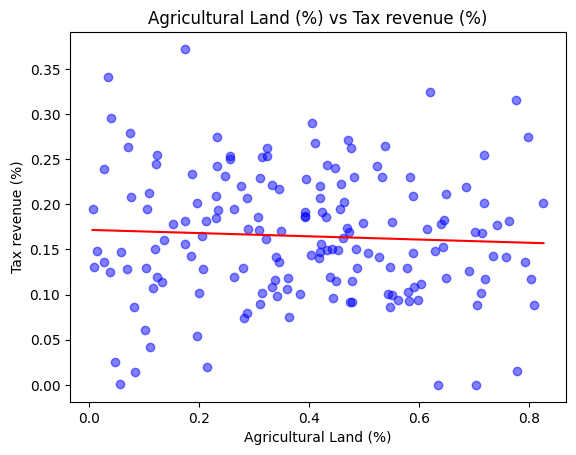

In [172]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Scatter plot for Agricultural Land (%) vs Tax revenue (%)
plt.title('Agricultural Land (%) vs Tax revenue (%)')
plt.xlabel('Agricultural Land (%)')
plt.ylabel('Tax revenue (%)')
plt.scatter(data['Agricultural Land( %)'], data['Tax revenue (%)'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Agricultural Land( %)'], data['Tax revenue (%)'], 1)
line = slope * np.unique(data['Agricultural Land( %)']) + intercept

plt.plot(np.unique(data['Agricultural Land( %)']), line, color='red')
plt.show()


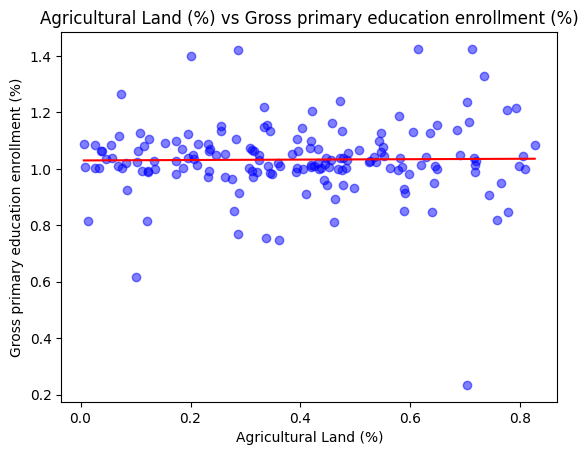

In [173]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Scatter plot for Agricultural Land (%) vs Gross primary education enrollment (%)
plt.title('Agricultural Land (%) vs Gross primary education enrollment (%)')
plt.xlabel('Agricultural Land (%)')
plt.ylabel('Gross primary education enrollment (%)')
plt.scatter(data['Agricultural Land( %)'], data['Gross primary education enrollment (%)'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Agricultural Land( %)'], data['Gross primary education enrollment (%)'], 1)
line = slope * np.unique(data['Agricultural Land( %)']) + intercept

plt.plot(np.unique(data['Agricultural Land( %)']), line, color='red')
plt.show()


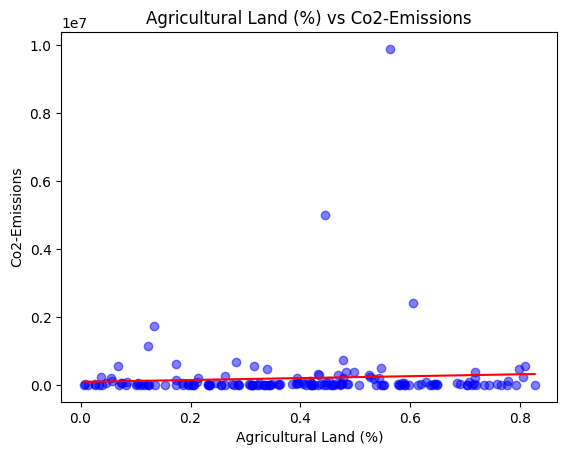

In [174]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Scatter plot for Agricultural Land (%) vs Co2-Emissions
plt.title('Agricultural Land (%) vs Co2-Emissions')
plt.xlabel('Agricultural Land (%)')
plt.ylabel('Co2-Emissions')
plt.scatter(data['Agricultural Land( %)'], data['Co2-Emissions'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Agricultural Land( %)'], data['Co2-Emissions'], 1)
line = slope * np.unique(data['Agricultural Land( %)']) + intercept

plt.plot(np.unique(data['Agricultural Land( %)']), line, color='red')
plt.show()


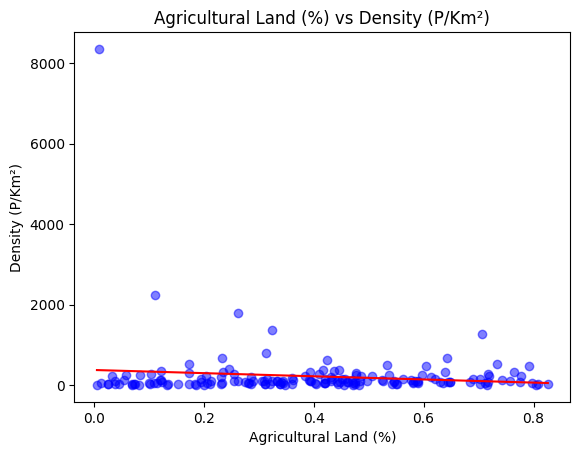

In [175]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Scatter plot for Agricultural Land (%) vs Density (P/Km²)
plt.title('Agricultural Land (%) vs Density (P/Km²)')
plt.xlabel('Agricultural Land (%)')
plt.ylabel('Density (P/Km²)')
plt.scatter(data['Agricultural Land( %)'], data['Density(P/Km2)'], color='blue', alpha=0.5)

# Calculating the best fit line using linear regression (first-degree polynomial)
slope, intercept = np.polyfit(data['Agricultural Land( %)'], data['Density(P/Km2)'], 1)
line = slope * np.unique(data['Agricultural Land( %)']) + intercept

plt.plot(np.unique(data['Agricultural Land( %)']), line, color='red')
plt.show()


</h1> Calculating Pearson correlation coefficient</h1>


In [176]:
corr = pearsonr(data['Life expectancy'], data['Agricultural Land( %)'])
print(corr)

PearsonRResult(statistic=-0.21564798566805657, pvalue=0.00526521109447546)
